## Research Questions
- What genre of games have the highest sales? (Jeff)
- What kind of ESRB ratings do top selling games have? (Kristen)
- Which publishers have received the most sales? (Kyle)
- What are the sales trends of certain games in different regions? (Jeff)
- Do certain regions lean towards specific game genres? (Kristen)
- On what platform do games receive more sales? (Kyle)
- What is the relationship between the critic & user scores to the game’s sales? (Jeff)
- Are newer games able to compare against older games with sales? (Kristen)
- What is the trend of newer video game releases per console? (Kyle)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
df2019 = pd.read_csv('vgsales-12-4-2019.csv')
df2020 = pd.read_csv('vgchartz-7_7_2020.csv')

In [3]:
df2019

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [4]:
df2020

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,1981-10-23,2020-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57945,58851,/games/boxart/full_2294305JapanFrontccc.jpg,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,2019-04-03
57946,58852,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
57947,58853,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
57948,58854,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09


In [5]:
df2019.rename({'Name': 'title'}, axis=1, inplace=True)
df2019=df2019[['title','ESRB_Rating']]
df2020.rename({'total_sales': 'global_sales'}, axis=1, inplace=True)
df2019

,title,ESRB_Rating
0,Wii Sports,E
1,Super Mario Bros.,NaN
2,Mario Kart Wii,E
3,PlayerUnknown's Battlegrounds,NaN
4,Wii Sports Resort,E
...,...,...
55787,Indivisible,NaN
55788,Lost Ember,RP
55789,Lost Ember,RP
55790,Lost Ember,RP


In [6]:
df_merged = pd.merge(df2020, df2019,how="inner")
#df_merged = df2020.join(df2019,how="inner",on="title")
#df_merged = pd.concat(df2020, df2019,how="left")
#df_merged = pd.concat([df2020, df2019], axis=1)
#df_merged = pd.merge(df2020, df2019, left_index=True, right_index=True, how='outer')
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130024,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [7]:
df_merged.drop_duplicates(keep='first',inplace=True,subset=df_merged.columns.difference(['title','console','ESRB_Rating','genre','publisher','developer']))
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130022,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55862 entries, 0 to 130028
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     55862 non-null  int64  
 1   img            55862 non-null  object 
 2   title          55862 non-null  object 
 3   console        55862 non-null  object 
 4   genre          55862 non-null  object 
 5   publisher      55862 non-null  object 
 6   developer      55845 non-null  object 
 7   vg_score       853 non-null    float64
 8   critic_score   6492 non-null   float64
 9   user_score     375 non-null    float64
 10  total_shipped  2209 non-null   float64
 11  global_sales   19193 non-null  float64
 12  na_sales       12872 non-null  float64
 13  jp_sales       6901 non-null   float64
 14  pal_sales      13065 non-null  float64
 15  other_sales    15382 non-null  float64
 16  release_date   52701 non-null  object 
 17  last_update    9865 non-null   object 
 18  ESRB_

In [9]:
df_merged.isnull().sum()

Unnamed: 0           0
img                  0
title                0
console              0
genre                0
publisher            0
developer           17
vg_score         55009
critic_score     49370
user_score       55487
total_shipped    53653
global_sales     36669
na_sales         42990
jp_sales         48961
pal_sales        42797
other_sales      40480
release_date      3161
last_update      45997
ESRB_Rating      31177
dtype: int64

In [10]:
df_merged.dropna(subset=['developer'],inplace=True)
df_merged = df_merged.reset_index(drop=True)
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
55841,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
55842,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
55843,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [11]:
df_merged.drop(['Unnamed: 0', 'img','last_update'], axis = 1, inplace=True)
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN
55841,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN
55842,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN
55843,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN


In [12]:
def addTotalSales(df_merged):
    if not pd.isna(df_merged['global_sales']):
        return df_merged['global_sales']
    elif not pd.isna(df_merged['total_shipped']):
        return df_merged['total_shipped']
    else:
        return df_merged['na_sales'] + df_merged['pal_sales'] + df_merged['jp_sales'] + df_merged['other_sales']

In [13]:
df_merged['Total_Sales'] = df_merged.apply(lambda x: addTotalSales(x), axis=1)

In [14]:
df_merged[0:20]

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,35.05
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,4.62
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,22.00
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,2.16
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M,NaN
5,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,M,20.32
6,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,NaN,9.7,NaN,NaN,19.39,6.06,0.60,9.71,3.02,2014-11-18,M,19.39
7,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,M,15.86
8,Grand Theft Auto V,PC,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,2015-04-14,M,12.60
9,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,NaN,9.0,9.0,NaN,8.72,4.70,0.01,3.25,0.76,2014-11-18,M,8.72


In [15]:
df_merged = df_merged.sort_values('Total_Sales', ascending=False)
df_merged = df_merged.reset_index(drop=True)

In [16]:
df_merged.describe()

,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,Total_Sales
count,853.000000,6492.000000,375.000000,2209.000000,19189.000000,12870.000000,6901.000000,13062.000000,15379.000000,21398.000000
mean,7.380305,7.212400,8.114933,3.902100,0.362932,0.273277,0.109332,0.153633,0.044307,0.728295
std,1.389045,1.455481,1.594707,15.262025,0.826811,0.509090,0.182772,0.396473,0.128626,5.080270
min,2.600000,1.000000,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.700000,6.400000,7.500000,0.190000,0.030000,0.050000,0.020000,0.010000,0.000000,0.040000
50%,7.700000,7.500000,8.500000,0.690000,0.120000,0.120000,0.050000,0.040000,0.010000,0.140000
75%,8.400000,8.300000,9.100000,2.200000,0.360000,0.280000,0.120000,0.140000,0.040000,0.430000
max,9.600000,10.000000,10.000000,310.000000,20.320000,9.760000,2.690000,9.850000,3.120000,310.000000


In [17]:
df_merged.describe(include=object)

,title,console,genre,publisher,developer,release_date,ESRB_Rating
count,55845,55845,55845,55845,55845,52690,24680
unique,36808,77,20,3141,8189,7387,8
top,Plants vs. Zombies,PC,Misc,Unknown,Unknown,1994-01-01,E
freq,20,10954,9153,4607,4410,507,11045


In [18]:
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,Grand Theft Auto,Series,Action-Adventure,ASC Games,Rockstar North|Rockstar Leeds|Digital Eclipse,NaN,NaN,NaN,310.0,NaN,NaN,NaN,NaN,NaN,1998-03-27,M,310.0
1,Call of Duty,Series,Shooter,Activision,Infinity Ward|Grey Matter Interactive|Treyarch...,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,2003-10-29,T,300.0
2,The Sims,Series,Simulation,Electronic Arts,Maxis,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,2000-02-04,T,200.0
3,Minecraft,Series,Sandbox,Mojang,Mojang,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,2011-11-18,NaN,200.0
4,Tetris,Series,Puzzle,Unknown,Alexey Pajitnov|AcademySoft|Andromeda Software...,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,1984-06-06,E,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN,NaN
55841,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN,NaN
55842,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN,NaN
55843,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN,NaN


In [19]:
df_merged.to_csv('Adjusted Video Game Sales Database.csv')

# Consoles

In [20]:
console_count = df_merged['console'].value_counts().rename_axis('Console Name').reset_index(name = 'counts')
console_count =  console_count.nlargest(10, 'counts')
console_count

,Console Name,counts
0,PC,10954
1,PS2,3548
2,DS,3256
3,PS,2690
4,XBL,2112
5,PSN,1994
6,PS3,1857
7,PS4,1788
8,PSP,1777
9,X360,1698


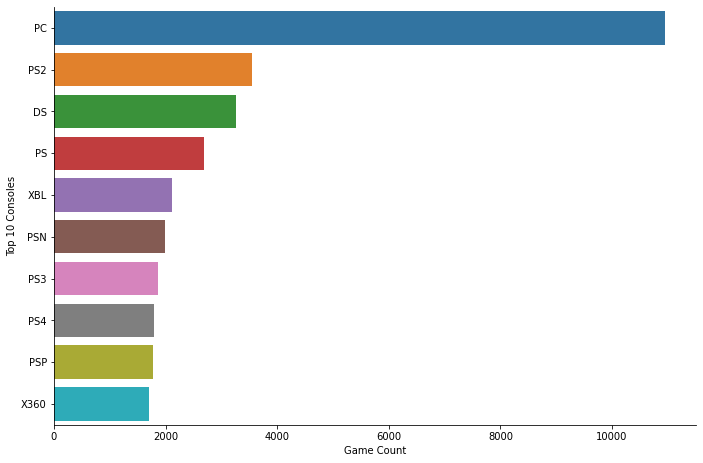

In [21]:
console_plot = sns.catplot(data = console_count, x='counts', y = 'Console Name', kind='bar', orient='h' )
console_plot.fig.set_size_inches(10.5, 6.5)
console_plot.set_axis_labels("Game Count", "Top 10 Consoles")

# ESRB Rating

This section counts how many unique video game titles there are that have the same ESRB

In [22]:
esrbToCount = df_merged[['title', 'ESRB_Rating']]
esrbToCount = esrbToCount.groupby(["ESRB_Rating"], as_index=False)['title'].nunique()
esrbToCount.rename(columns={'ESRB_Rating': 'ESRB Rating', 'title':'Count'}, inplace=True)

esrbToCount = esrbToCount.sort_values(by="Count", ascending=False)

esrbToCount

,ESRB Rating,Count
1,E,6590
7,T,3578
5,M,1640
2,E10,1366
6,RP,197
3,EC,41
0,AO,16
4,KA,3


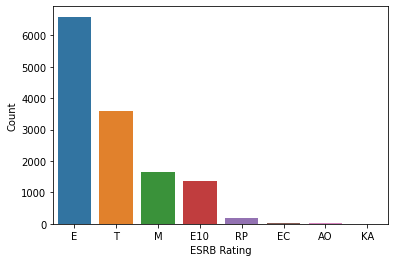

In [23]:
esrbtoCount_plot =  sns.barplot(data = esrbToCount, x = "ESRB Rating", y = "Count")

# Genre

In [24]:
genre_count = df_merged[['title', 'genre']]
genre_count = genre_count.groupby(["genre"], as_index=False)['title'].nunique()
genre_count.rename(columns={'genre': 'Genre', 'title':'Count'}, inplace=True)

genre_count = genre_count.sort_values(by="Count", ascending=False)

genre_count

,Genre,Count
7,Misc,6825
0,Action,5010
2,Adventure,3857
13,Role-Playing,3321
17,Sports,3103
15,Shooter,2917
18,Strategy,2618
11,Puzzle,2361
16,Simulation,2156
10,Platform,2003


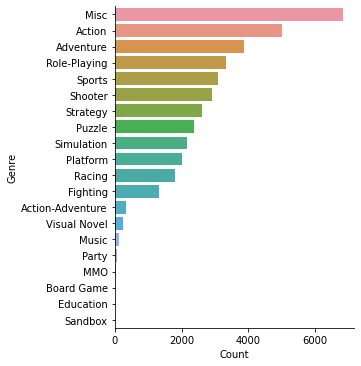

In [25]:
genre_plot = sns.catplot(data = genre_count, x = 'Count', y = 'Genre', orient='h', kind="bar")

# ESRB Rating to Total Sales

In [26]:
esrbToTotal = df_merged[['title', 'ESRB_Rating', 'Total_Sales']]

esrbToTotal

,title,ESRB_Rating,Total_Sales
0,Grand Theft Auto,M,310.0
1,Call of Duty,T,300.0
2,The Sims,T,200.0
3,Minecraft,NaN,200.0
4,Tetris,E,171.0
...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN
55841,Without Within,NaN,NaN
55842,Without Within 2,NaN,NaN
55843,Without Within 3,NaN,NaN


In [27]:
esrbToTotal['Total_Sales'].describe()

count    21398.000000
mean         0.728295
std          5.080270
min          0.000000
25%          0.040000
50%          0.140000
75%          0.430000
max        310.000000
Name: Total_Sales, dtype: float64

### **Checking sales of AO and KA

In [28]:
esrbToTotal_a = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('AO') == True]

esrbToTotal_a = esrbToTotal_a.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_a

,ESRB_Rating,Total_Sales
0,AO,0.0


In [29]:
esrbToTotal_b = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('KA') == True]

esrbToTotal_b = esrbToTotal_b.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_b

,ESRB_Rating,Total_Sales
0,KA,0.0


### Plotting for ESRB to Total Sales

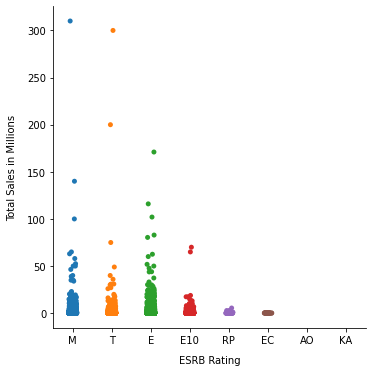

In [30]:
ESRB_sales_plot = sns.catplot(y = 'Total_Sales', x = 'ESRB_Rating', data=esrbToTotal)
ESRB_sales_plot.set_axis_labels("ESRB Rating", "Total Sales in Millions", labelpad=10)

# Genre to Total Sales

In [31]:
df_merged['genre'].describe()

count     55845
unique       20
top        Misc
freq       9153
Name: genre, dtype: object

In [32]:
df_merged['genre'].unique()

array(['Action-Adventure', 'Shooter', 'Simulation', 'Sandbox', 'Puzzle',
       'Role-Playing', 'Sports', 'Racing', 'Platform', 'Music',
       'Education', 'Fighting', 'Party', 'Strategy', 'Misc', 'Action',
       'MMO', 'Adventure', 'Visual Novel', 'Board Game'], dtype=object)

In [33]:
genre_sales =  df_merged.groupby(['genre'], as_index=False)['Total_Sales'].sum()
genre_sales

,genre,Total_Sales
0,Action,1625.59
1,Action-Adventure,1414.05
2,Adventure,531.08
3,Board Game,0.33
4,Education,65.42
5,Fighting,746.69
6,MMO,63.90
7,Misc,942.03
8,Music,205.24
9,Party,159.74


In [34]:
total_per_genre = genre_sales['Total_Sales']

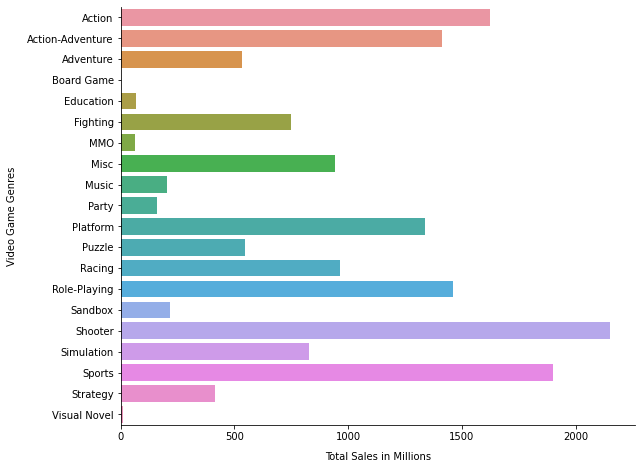

In [35]:
genre_sales_plot = sns.catplot(y = 'genre', x = 'Total_Sales', data=genre_sales, orient='h', kind='bar')
genre_sales_plot.fig.set_size_inches(10.5, 6.5)
genre_sales_plot.set_axis_labels("Total Sales in Millions", "Video Game Genres", labelpad=10)

# Console To Total Sales

In [36]:
df_merged['console'].describe()

count     55845
unique       77
top          PC
freq      10954
Name: console, dtype: object

In [37]:
df_merged['console'].unique()

array(['Series', 'Wii', 'NES', 'PC', 'DS', 'GB', 'NS', 'X360', 'SNES',
       'PS3', 'PS4', '3DS', 'PS2', 'GEN', 'N64', 'PS', 'XOne', 'WiiU',
       'XB', 'PSP', '2600', 'GC', 'GBA', 'GBC', 'PSN', 'PSV', 'DC', 'XBL',
       'SAT', 'SCD', 'WS', 'Amig', 'VC', 'NG', 'WW', 'PCE', '3DO', 'GG',
       'OSX', 'Mob', 'PCFX', 'XSX', 'PS5', '5200', 'Int', 'And', 'WinP',
       'Linux', 'NGage', 'ACPC', 'Arc', 'AST', 'ZXS', 'C64', 'MS', 'S32X',
       'Lynx', '7800', 'ApII', 'MSX', 'DSiW', 'DSi', 'FMT', 'MSD', 'AJ',
       'iQue', 'iOS', 'GIZ', 'BRW', 'VB', 'Ouya', 'TG16', 'C128', 'CDi',
       'CD32', 'BBCM', 'Aco'], dtype=object)

In [38]:
console_sales =  df_merged.groupby(['console'], as_index=False)['Total_Sales'].sum()
console_sales = console_sales.sort_values(ascending=False, by=['Total_Sales'])
console_sales[0:10]

,console,Total_Sales
60,Series,5113.47
49,PS2,1255.53
45,PC,1180.15
69,X360,983.18
50,PS3,965.74
66,Wii,894.43
20,DS,741.34
48,PS,728.32
51,PS4,692.25
72,XOne,298.87


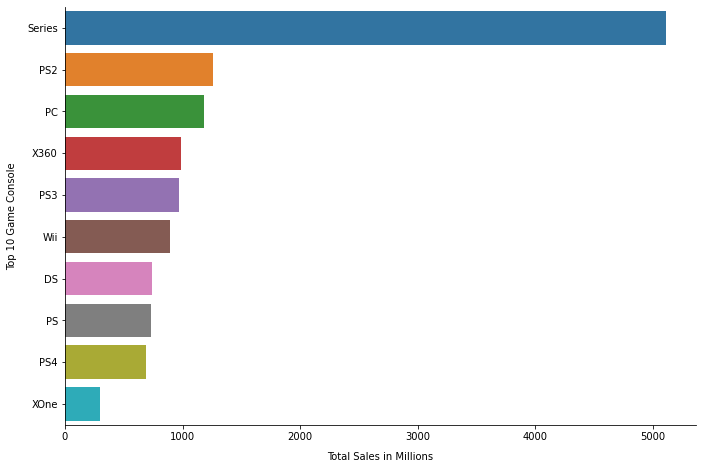

In [39]:
console_sales_plot = sns.catplot(y = 'console', x = 'Total_Sales', data=console_sales[0:10], orient='h', kind='bar')
console_sales_plot.fig.set_size_inches(10.5, 6.5)
console_sales_plot.set_axis_labels("Total Sales in Millions", "Top 10 Game Console", labelpad=10)

# Title to Total Sales

In [62]:
title_total = df_merged[['title', 'Total_Sales', 'console']]

title_total

,title,Total_Sales,console
0,Grand Theft Auto,310.0,Series
1,Call of Duty,300.0,Series
2,The Sims,200.0,Series
3,Minecraft,200.0,Series
4,Tetris,171.0,Series
...,...,...,...
55840,WILL: A Wonderful World,NaN,PC
55841,Without Within,NaN,PC
55842,Without Within 2,NaN,PC
55843,Without Within 3,NaN,PC


In [63]:
title_total_sum = title_total.groupby(["title", 'console'], as_index=False)['Total_Sales'].sum()
title_total_sum = title_total_sum.sort_values(by='Total_Sales', ascending=False)
title_total_sum = title_total_sum.nlargest(20, 'Total_Sales')
title_total_sum

,title,console,Total_Sales
19158,Grand Theft Auto,Series,310.00
7367,Call of Duty,Series,300.00
29126,Minecraft,Series,200.00
48607,The Sims,Series,200.00
46721,Tetris,Series,171.00
16389,Final Fantasy,Series,152.50
3286,Assassin's Creed,Series,140.00
53300,Wii Sports,Series,115.99
48010,The Legend of Zelda,Series,107.07
35891,Pro Evolution Soccer,Series,106.80


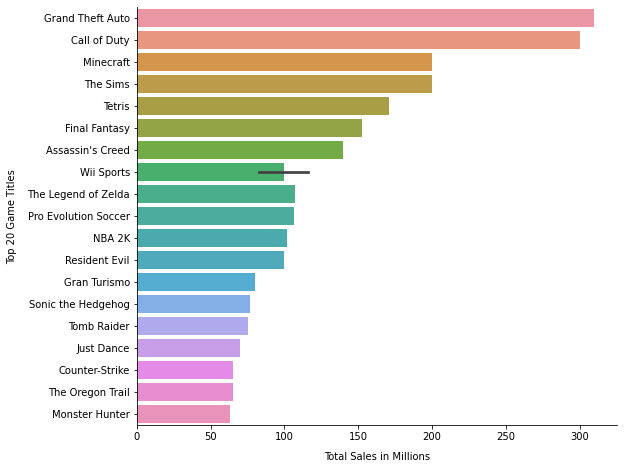

In [64]:
title_total_plot = sns.catplot(data = title_total_sum, x = "Total_Sales", y = "title", kind="bar", orient = 'h')
title_total_plot.fig.set_size_inches(10.5, 6.5)
title_total_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles", labelpad=10)

# Top 10 Games Per Region

In [70]:
region_sales = df_merged[['title', 'na_sales','jp_sales','pal_sales','other_sales']]

region_sales

,title,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto,NaN,NaN,NaN,NaN
1,Call of Duty,NaN,NaN,NaN,NaN
2,The Sims,NaN,NaN,NaN,NaN
3,Minecraft,NaN,NaN,NaN,NaN
4,Tetris,NaN,NaN,NaN,NaN
...,...,...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN,NaN,NaN
55841,Without Within,NaN,NaN,NaN,NaN
55842,Without Within 2,NaN,NaN,NaN,NaN
55843,Without Within 3,NaN,NaN,NaN,NaN


In [71]:
region_sales_na = region_sales.groupby(["title"], as_index=False)['na_sales'].sum()
region_sales_na = region_sales_na.sort_values(by='na_sales', ascending=False)
region_sales_na = region_sales_na.nlargest(20, 'na_sales')
region_sales_na

,title,na_sales
12707,Grand Theft Auto V,26.19
4863,Call of Duty: Black Ops,17.65
4875,Call of Duty: Modern Warfare 3,15.57
4872,Call of Duty: Ghosts,15.06
4869,Call of Duty: Black Ops II,14.12
4874,Call of Duty: Modern Warfare 2,13.54
4868,Call of Duty: Black Ops 3,12.82
12702,Grand Theft Auto IV,11.60
12962,Guitar Hero III: Legends of Rock,11.14
4862,Call of Duty: Advanced Warfare,10.66


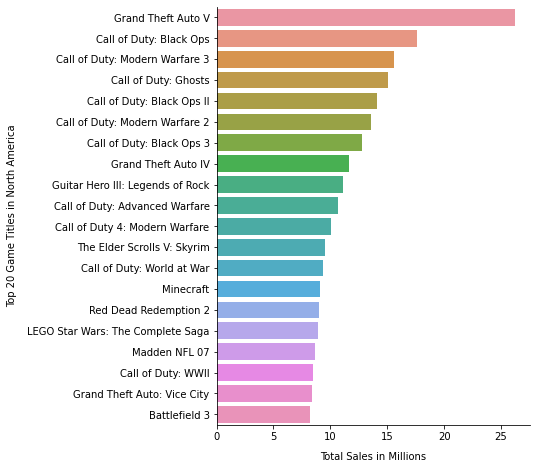

In [72]:
region_sales_na_plot = sns.catplot(data = region_sales_na, x = "na_sales", y = "title", kind="bar", orient = 'h')
region_sales_na_plot.fig.set_size_inches(10.5, 6.5)
region_sales_na_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in North America", labelpad=10)

In [73]:
region_sales_jp = region_sales.groupby(["title"], as_index=False)['jp_sales'].sum()
region_sales_jp = region_sales_jp.sort_values(by='jp_sales', ascending=False)
region_sales_jp = region_sales_jp.nlargest(20, 'jp_sales')
region_sales_jp

,title,jp_sales
14287,Hot Shots Golf,4.26
36109,Yokai Watch 2: Psychic Specters,2.69
19514,Minecraft,2.50
36279,Yu-Gi-Oh: Duel Monsters 4,2.17
24522,R.B.I. Baseball,2.05
7725,Derby Stallion,2.05
10474,Famista '89 - Kaimaku Han!!,2.05
10848,Final Fantasy XIII,1.88
8878,Dragon Quest XI,1.82
30103,Super Puyo Puyo,1.69


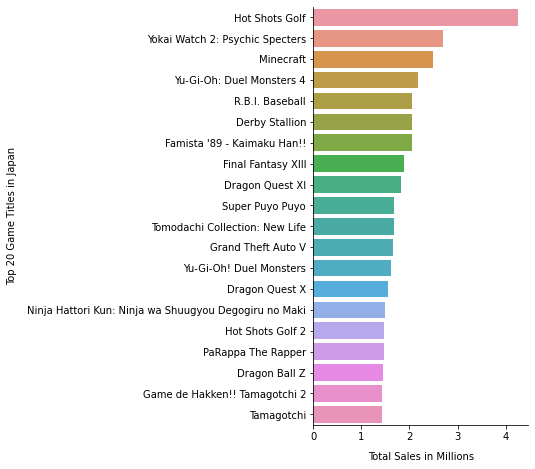

In [81]:
region_sales_jp_plot = sns.catplot(data = region_sales_jp, x = "jp_sales", y = "title", kind="bar", orient = 'h')
region_sales_jp_plot.fig.set_size_inches(20.5, 6.5)
region_sales_jp_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in Japan", labelpad=10)

In [75]:
region_sales_pal = region_sales.groupby(["title"], as_index=False)['pal_sales'].sum()
region_sales_pal = region_sales_pal.sort_values(by='pal_sales', ascending=False)
region_sales_pal = region_sales_pal.nlargest(20, 'pal_sales')
region_sales_pal

,title,pal_sales
12707,Grand Theft Auto V,28.14
10210,FIFA 15,12.45
10209,FIFA 14,12.14
10213,FIFA 17,12.07
10214,FIFA 18,11.78
4875,Call of Duty: Modern Warfare 3,11.26
4869,Call of Duty: Black Ops II,11.08
10212,FIFA 16,10.56
10208,FIFA 13,10.11
4868,Call of Duty: Black Ops 3,9.76


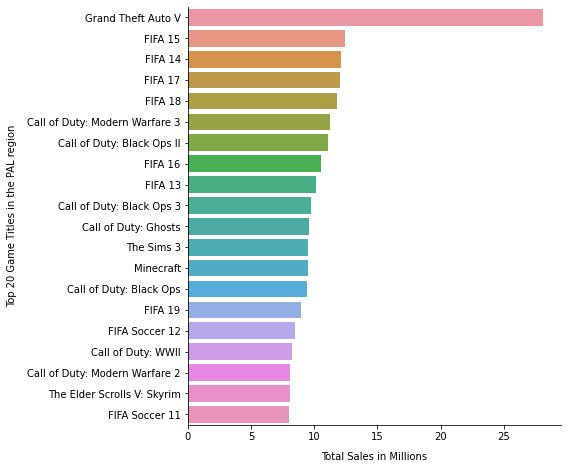

In [76]:
region_sales_pal_plot = sns.catplot(data = region_sales_pal, x = "pal_sales", y = "title", kind="bar", orient = 'h')
region_sales_pal_plot.fig.set_size_inches(10.5, 6.5)
region_sales_pal_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in the PAL region", labelpad=10)

In [77]:
region_sales_other = region_sales.groupby(["title"], as_index=False)['other_sales'].sum()
region_sales_other = region_sales_other.sort_values(by='other_sales', ascending=False)
region_sales_other = region_sales_other.nlargest(20, 'other_sales')
region_sales_other

,title,other_sales
12707,Grand Theft Auto V,8.32
4869,Call of Duty: Black Ops II,3.67
4872,Call of Duty: Ghosts,3.65
4868,Call of Duty: Black Ops 3,3.63
10233,FIFA Soccer 08,3.53
23978,Pro Evolution Soccer 2008,3.51
4863,Call of Duty: Black Ops,3.31
4875,Call of Duty: Modern Warfare 3,3.26
19514,Minecraft,2.96
4874,Call of Duty: Modern Warfare 2,2.95


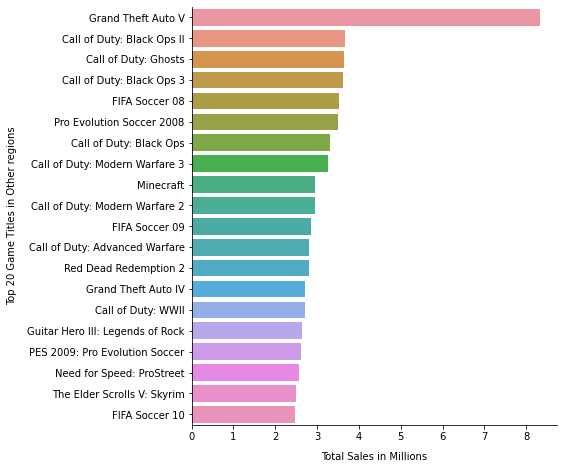

In [78]:
region_sales_other_plot = sns.catplot(data = region_sales_other, x = "other_sales", y = "title", kind="bar", orient = 'h')
region_sales_other_plot.fig.set_size_inches(10.5, 6.5)
region_sales_other_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles in Other regions", labelpad=10)

# Critic Score and User Score Relationship

In [83]:
crit_user_score = df_merged[['title', 'Total_Sales','critic_score','user_score' ]]

crit_user_score

,title,Total_Sales,critic_score,user_score
0,Grand Theft Auto,310.0,NaN,NaN
1,Call of Duty,300.0,NaN,NaN
2,The Sims,200.0,NaN,NaN
3,Minecraft,200.0,NaN,NaN
4,Tetris,171.0,NaN,NaN
...,...,...,...,...
55840,WILL: A Wonderful World,NaN,NaN,NaN
55841,Without Within,NaN,NaN,NaN
55842,Without Within 2,NaN,NaN,NaN
55843,Without Within 3,NaN,NaN,NaN


In [87]:
crit_user_score = crit_user_score.dropna(how='any',axis=0) 

crit_user_score[0:50]

,title,Total_Sales,critic_score,user_score
37,Super Mario Bros.,40.24,10.0,8.2
41,Mario Kart Wii,37.32,8.2,9.1
48,Wii Sports Resort,33.13,8.0,8.8
51,New Super Mario Bros.,30.80,9.1,8.1
52,New Super Mario Bros. Wii,30.30,8.6,9.2
60,Wii Play,28.02,5.9,4.5
71,Mario Kart DS,23.60,9.1,9.4
93,Super Smash Bros. Ultimate,18.84,9.4,9.7
99,The Legend of Zelda: Breath of the Wild,17.41,9.9,10.0
125,Halo 3,14.50,9.6,9.5


In [88]:
crit_user_score.describe()

,Total_Sales,critic_score,user_score
count,221.000000,221.000000,221.000000
mean,3.483937,8.145249,8.553394
std,6.140744,1.185111,1.121991
min,0.000000,3.500000,3.000000
25%,0.550000,7.500000,8.000000
50%,1.330000,8.200000,8.800000
75%,3.640000,9.100000,9.300000
max,40.240000,10.000000,10.000000
